## Titanic
Vamos analisar os dados dos passageiros do Titanic. Começamos importando os dados de um arquivo csv ou carregando um dataset disponível no pacote Seaborn.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

Para termos um entendimento inicial do data frame utilizado, podemos utilizar o comando shape. Como o nome sugere, este comando nos informará o formato do dataframe em termos de linhas e colunas.

In [3]:
df.shape

(891, 15)

Para entendermos melhor o formato do data frame, podemos utilizar o comando head, que lista os 5 primeiros registros do data frame.

In [4]:
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

Dá pra saber também os tipos de dados de cada coluna com o comando dtypes.

In [28]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Outro ponto importante é entender que na maioria dos dataframes há dados incompletos. Para analisar quais dados estão imcompletos no nosso dataframe usaremos o comando isnull.

In [30]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Vamos agora usar um pouco de estatística descritiva para termos alguns insights a respeito das informações dos passageiros do Titanic. Vamos começar analisando a média, a mediana e a moda da idade dos passageiros.

In [7]:
#pega a media
df['age'].mean()

29.69911764705882

In [9]:
#pega a mediana 
df['age'].median()

28.0

In [10]:
#a moda
df['age'].mode()

0    24.0
Name: age, dtype: float64

Vamos agora plotar histogramas das colunas nas quais é possível aplicar a geração automática de histogramas. A geração automática depende do tipo de dado da coluna.

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

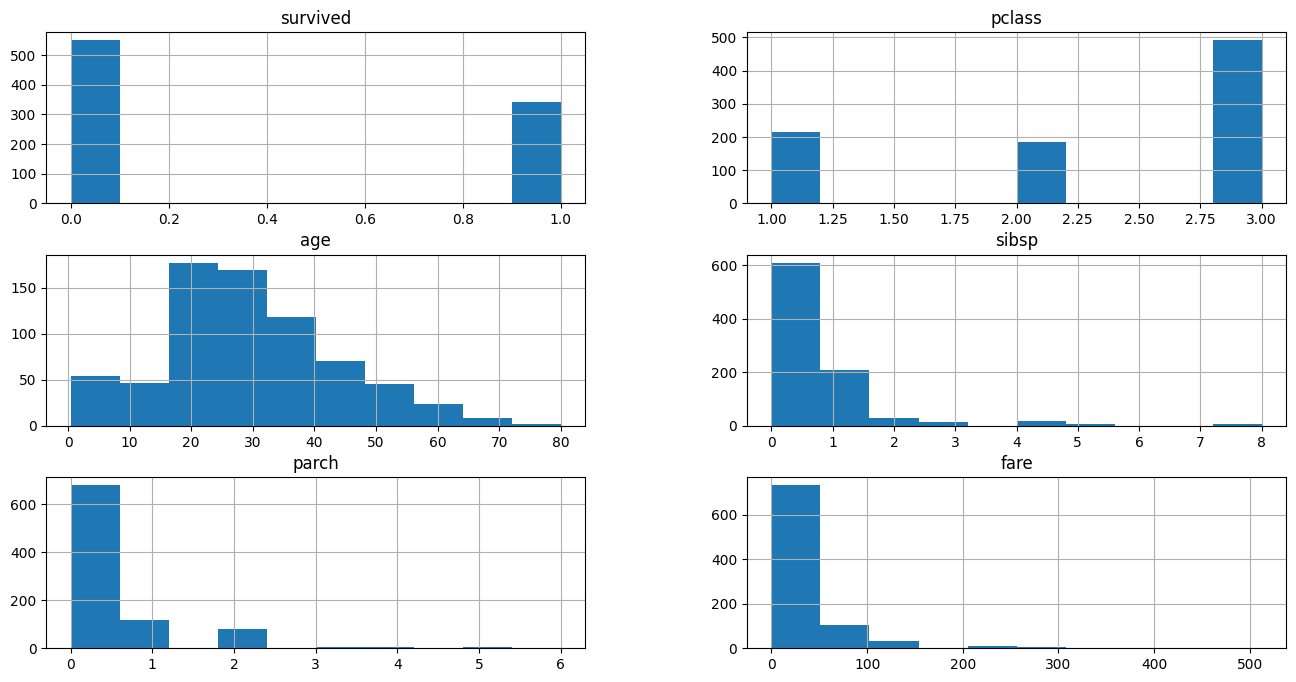

In [11]:
# gera grafico para cada coluna
df.hist(figsize=(16,8))

Vamos agora plotar um histograma de uma coluna específica (Idade).

array([[<Axes: title={'center': 'age'}>]], dtype=object)

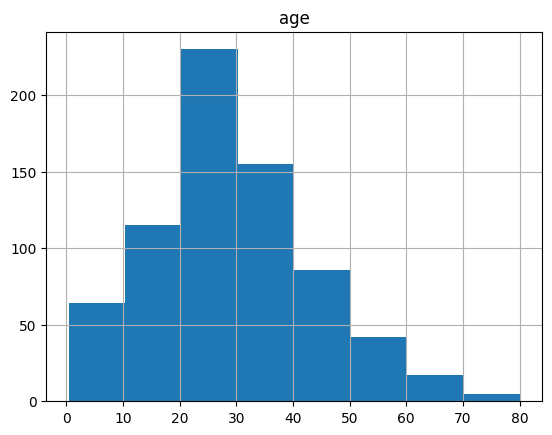

In [14]:
#bins colunas do grafico
df.hist(column='age', bins=8)

Agora vamos plotar um histograma da tarifa paga por cada passageiro.

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

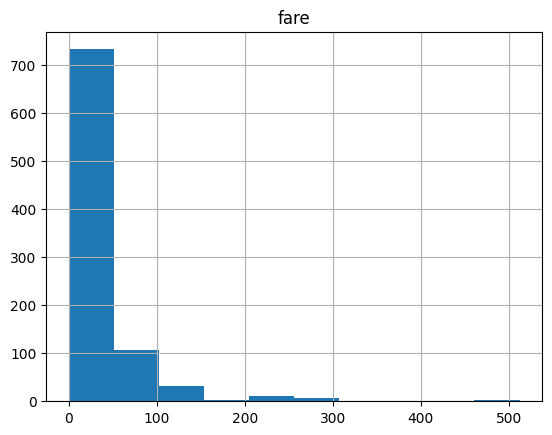

In [15]:
df.hist(column='fare')

Vamos fazer fatores que podem ter impactado a sobrevivência dos passageiros, começando pelo sexo. Vamos iniciar plotanto um gráfico que mostra o número de mortos e sobreviventes. 

<Axes: xlabel='alive', ylabel='count'>

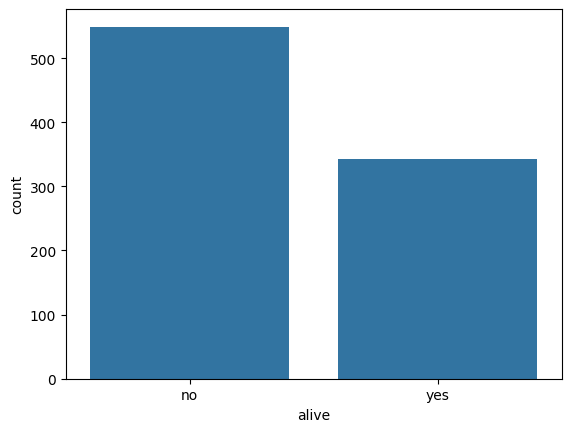

In [16]:
# conta os que sobreviveram ou nao
sns.countplot(x='alive', data=df)

Mulheres e homens morreram em igual proporção?

<Axes: xlabel='sex', ylabel='count'>

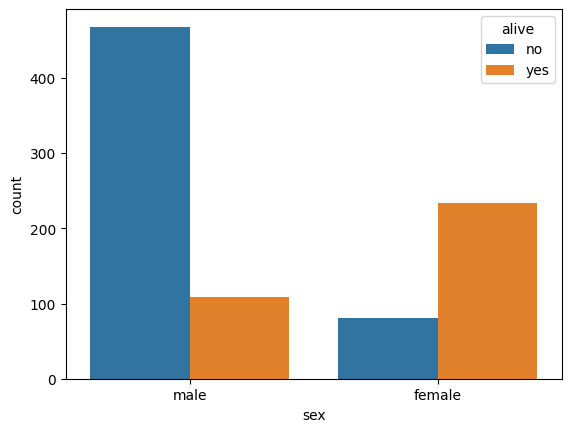

In [17]:
# distinguem os passageros que morreram através do sexo
sns.countplot(x='sex',hue='alive', data=df)


A proporção de mortes foi igual em todas as classes do navio? (Primeira classe: mais cara; terceira classe: mais barata).

<Axes: xlabel='pclass', ylabel='count'>

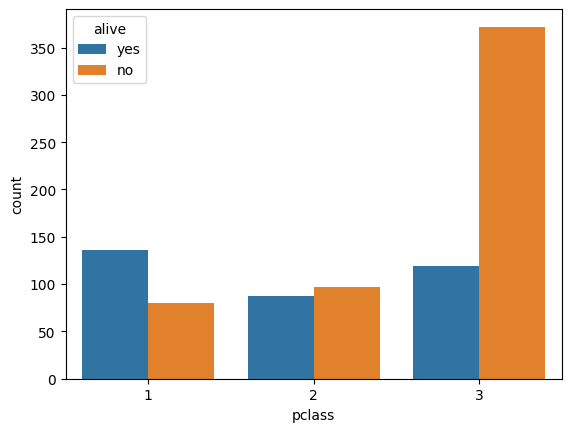

In [21]:
sns.countplot(x='pclass', hue='alive', data=df)

Gráficos de pizza são também interessantes para comparar proporções. Vamos plotar um gráfico de pizza para comparar o número total de sobreviventes vs não sobreviventes.

C:\Users\Pedro Venancio\AppData\Local\Temp\ipykernel_10180\1821919579.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sobrev = df[df.survived == 1].count()[0]
C:\Users\Pedro Venancio\AppData\Local\Temp\ipykernel_10180\1821919579.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_sobrev = df[df.survived == 0].count()[1]


([<matplotlib.patches.Wedge at 0x2790f6e5850>,
 [Text(-1.0275626481479563, 0.3925748388921016, 'sobreviveu'),
  Text(1.0275626849034607, -0.39257474268474213, 'nao sobreviveu')])

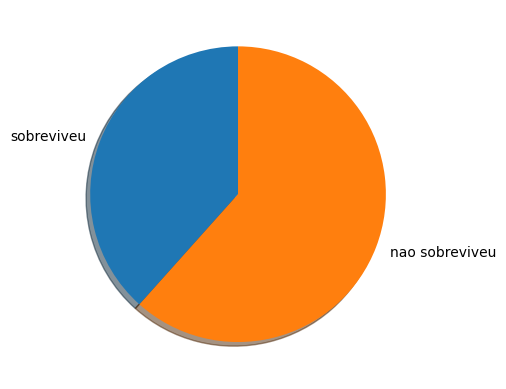

In [27]:
sobrev = df[df.survived == 1].count()[0]
nao_sobrev = df[df.survived == 0].count()[1]

plt.pie([sobrev, nao_sobrev], labels=['sobreviveu', 'nao sobreviveu'], autopct='%1.1f%%', shadow ='false', startangle=90)